In [2]:
# WiDS

In [ ]:
# Links
# https://link.springer.com/article/10.1007/BF01421959
# https://arxiv.org/pdf/1805.07405.pdf
# https://github.com/lstruski/Processing-of-missing-data-by-neural-networks

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

/Users/jekahn/.venv/py36/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/jekahn/.venv/py36/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)

In [3]:
train = pd.read_csv('/Users/jekahn/Downloads/widsdatathon2020/training_v2.csv')

In [4]:
wids_dict = pd.read_csv('/Users/jekahn/Downloads/widsdatathon2020/WiDS Datathon 2020 Dictionary.csv')

In [5]:
wids_dict.head()

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
0,identifier,encounter_id,None,integer,Unique identifier associated with a patient un...,None
1,identifier,hospital_id,None,integer,Unique identifier associated with a hospital,None
2,identifier,patient_id,None,integer,Unique identifier associated with a patient,None
3,demographic,hospital_death,None,binary,Whether the patient died during this hospitali...,0
4,demographic,age,Years,numeric,The age of the patient on unit admission,None


In [6]:
unlabeled = pd.read_csv('/Users/jekahn/Downloads/widsdatathon2020/unlabeled.csv')

In [7]:
train.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

In [59]:
train['hospital_id'] = train['hospital_id'].apply(str)

In [60]:
num_cols = train.select_dtypes(include=np.number).columns.tolist()

In [61]:
train_ = train.copy()

In [62]:
for col in num_cols:
    if col=='ethnicity':
        print(col)
    train_[col].fillna(train_[col].mean(), inplace=True)

In [63]:
train_[cat_cols].isnull().sum(axis = 0)

ethnicity                 1395
gender                      25
hospital_admit_source    21409
icu_admit_source           112
icu_stay_type                0
icu_type                     0
apache_3j_bodysystem      1662
apache_2_bodysystem       1662
dtype: int64

In [64]:
cat_cols = [col for col in train_.columns if col not in num_cols]
cat_cols

['hospital_id',
 'ethnicity',
 'gender',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'apache_3j_bodysystem',
 'apache_2_bodysystem']

In [65]:
train_[cat_cols].head()

,hospital_id,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
0,118,Caucasian,M,Floor,Floor,admit,CTICU,Sepsis,Cardiovascular
1,81,Caucasian,F,Floor,Floor,admit,Med-Surg ICU,Respiratory,Respiratory
2,118,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
3,118,Caucasian,F,Operating Room,Operating Room / Recovery,admit,CTICU,Cardiovascular,Cardiovascular
4,33,Caucasian,M,NaN,Accident & Emergency,admit,Med-Surg ICU,Trauma,Trauma


In [66]:
train.apache_3j_bodysystem.unique()

array(['Sepsis', 'Respiratory', 'Metabolic', 'Cardiovascular', 'Trauma',
       'Neurological', 'Gastrointestinal', 'Genitourinary', nan,
       'Hematological', 'Musculoskeletal/Skin', 'Gynecological'],
      dtype=object)

In [67]:
train_.ethnicity.fillna('Other/Unknown', inplace=True)
train_.gender.fillna('missing', inplace=True)
train_.hospital_admit_source.fillna('missing', inplace=True)
train_.icu_admit_source.fillna('missing', inplace=True)
train_.apache_3j_bodysystem.fillna('missing', inplace=True)
train_.apache_2_bodysystem.fillna('missing', inplace=True)

In [68]:
# train[train.ethnicity.str.isnumeric()].head()

In [69]:
dums = pd.get_dummies(train_[cat_cols], drop_first=True)

In [70]:
dums.head()

,hospital_id_100,hospital_id_101,hospital_id_102,hospital_id_103,hospital_id_104,hospital_id_105,hospital_id_107,hospital_id_109,hospital_id_111,hospital_id_112,hospital_id_113,hospital_id_116,hospital_id_117,hospital_id_118,hospital_id_119,hospital_id_121,hospital_id_124,hospital_id_125,hospital_id_128,hospital_id_129,hospital_id_13,hospital_id_130,hospital_id_132,hospital_id_133,hospital_id_134,hospital_id_135,hospital_id_136,hospital_id_137,hospital_id_138,hospital_id_139,hospital_id_14,hospital_id_140,hospital_id_142,hospital_id_145,hospital_id_146,hospital_id_147,hospital_id_149,hospital_id_15,hospital_id_150,hospital_id_151,hospital_id_155,hospital_id_157,hospital_id_158,hospital_id_159,hospital_id_16,hospital_id_160,hospital_id_161,hospital_id_166,hospital_id_167,hospital_id_168,hospital_id_169,hospital_id_17,hospital_id_171,hospital_id_174,hospital_id_176,hospital_id_177,hospital_id_179,hospital_id_18,hospital_id_180,hospital_id_181,hospital_id_182,hospital_id_183,hospital_id_184,hospital_id_185,hospital_id_186,hospital_id_187,hospital_id_188,hospital_id_189,hospital_id_19,hospital_id_192,hospital_id_194,hospital_id_195,hospital_id_196,hospital_id_197,hospital_id_198,hospital_id_199,hospital_id_2,hospital_id_20,hospital_id_200,hospital_id_202,hospital_id_204,hospital_id_21,hospital_id_23,hospital_id_24,hospital_id_26,hospital_id_27,hospital_id_29,hospital_id_3,hospital_id_30,hospital_id_31,hospital_id_32,hospital_id_33,hospital_id_34,hospital_id_35,hospital_id_36,hospital_id_37,hospital_id_38,hospital_id_39,hospital_id_4,hospital_id_40,hospital_id_43,hospital_id_44,hospital_id_46,hospital_id_47,hospital_id_49,hospital_id_5,hospital_id_50,hospital_id_51,hospital_id_53,hospital_id_54,hospital_id_55,hospital_id_57,hospital_id_6,hospital_id_60,hospital_id_62,hospital_id_63,hospital_id_64,hospital_id_66,hospital_id_68,hospital_id_69,hospital_id_70,hospital_id_71,hospital_id_72,hospital_id_74,hospital_id_76,hospital_id_77,hospital_id_78,hospital_id_79,hospital_id_8,hospital_id_80,hospital_id_81,hospital_id_83,hospital_id_84,hospital_id_85,hospital_id_87,hospital_id_88,hospital_id_89,hospital_id_9,hospital_id_90,hospital_id_91,hospital_id_92,hospital_id_93,hospital_id_94,hospital_id_95,hospital_id_98,hospital_id_99,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M,gender_missing,hospital_admit_source_Chest Pain Center,hospital_admit_source_Direct Admit,hospital_admit_source_Emergency Department,hospital_admit_source_Floor,hospital_admit_source_ICU,hospital_admit_source_ICU to SDU,hospital_admit_source_Observation,hospital_admit_source_Operating Room,hospital_admit_source_Other,hospital_admit_source_Other Hospital,hospital_admit_source_Other ICU,hospital_admit_source_PACU,hospital_admit_source_Recovery Room,hospital_admit_source_Step-Down Unit (SDU),hospital_admit_source_missing,icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,icu_admit_source_missing,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_3j_bodysystem_missing,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses,apache_2_bodysystem_missing
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [71]:
train_.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age',
       'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=186)

In [72]:
train_out = pd.concat([train_[num_cols], dums], axis=1)

In [73]:
train_out.columns

Index(['encounter_id', 'patient_id', 'hospital_death', 'age', 'bmi',
       'elective_surgery', 'height', 'icu_id', 'pre_icu_los_days',
       'readmission_status',
       ...
       'apache_2_bodysystem_Gastrointestinal',
       'apache_2_bodysystem_Haematologic', 'apache_2_bodysystem_Metabolic',
       'apache_2_bodysystem_Neurologic',
       'apache_2_bodysystem_Renal/Genitourinary',
       'apache_2_bodysystem_Respiratory', 'apache_2_bodysystem_Trauma',
       'apache_2_bodysystem_Undefined Diagnoses',
       'apache_2_bodysystem_Undefined diagnoses',
       'apache_2_bodysystem_missing'],
      dtype='object', length=380)

In [74]:
train_out[train_out[num_cols].columns].corr()['hospital_death'][:].head()

encounter_id     -0.005243
patient_id        0.004877
hospital_death    1.000000
age               0.106603
bmi              -0.030535
Name: hospital_death, dtype: float64

In [75]:
y = train_out.pop('hospital_death')

In [76]:
# np.sum(y)

In [77]:
X = train_out.drop(['encounter_id','patient_id','icu_id','hospital_admit_source_Observation'], axis=1)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [79]:
X_train.columns.tolist()[0:10]

['age',
 'bmi',
 'elective_surgery',
 'height',
 'pre_icu_los_days',
 'readmission_status',
 'weight',
 'albumin_apache',
 'apache_2_diagnosis',
 'apache_3j_diagnosis']

In [80]:
clf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

In [81]:
y_pred_random_forest = clf.predict_proba(X_test)
acc_random_forest = round(clf.score(X_test, y_test) * 100, 2)
print (acc_random_forest)
metrics.roc_auc_score(y_test,y_pred_random_forest[:,1])

92.91


0.8824156440393968

In [143]:
# Replace unlabeled missing values with mean from training

In [30]:
unlabeled.isnull().sum(axis = 0).head()

encounter_id          0
patient_id            0
hospital_id           0
hospital_death    39308
age                1654
dtype: int64

In [31]:
for col in num_cols:
    unlabeled[col].fillna(train[col].mean(), inplace=True)

In [32]:
unlabeled.ethnicity.fillna('Other/Unknown', inplace=True)
unlabeled.gender.fillna('missing', inplace=True)
unlabeled.hospital_admit_source.fillna('missing', inplace=True)
unlabeled.icu_admit_source.fillna('missing', inplace=True)
unlabeled.apache_3j_bodysystem.fillna('missing', inplace=True)
unlabeled.apache_2_bodysystem.fillna('missing', inplace=True)

In [33]:
unlabeled.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,2,127112,7,0.086302,56.000000,21.102439,0,Caucasian,M,180.300000,Emergency Department,Accident & Emergency,1105,admit,Neuro ICU,0.104167,0,68.6,3.700000,301.0,405.01,0,0.0,1.147721,19.00000,0.670000,0.595751,2.0,5.0,0.0,1.0,276.000000,105.0,42.000000,0.0,57.0,42.183238,42.183238,131.148467,7.353895,5.0,134.000000,36.6,1121.126400,0.0,4.700000,78.757006,46.738253,74.0,51.0,74.000000,51.000000,100.0,78.0,114.889748,62.318349,86.0,60.0,86.000000,60.000000,20.0,8.0,100.0,96.0,154.274312,93.813758,121.0,79.0,121.000000,79.000000,37.1,36.6,67.970331,56.142925,55.000000,51.00000,55.000000,51.000000,88.000000,84.00000,94.883633,75.97113,68.00000,60.000000,68.000000,60.000000,18.000000,8.000000,100.000000,98.00000,138.702822,114.834099,91.000000,79.000000,91.000000,79.000000,36.600000,36.600000,3.700000,3.700000,1.137308,1.067815,19.0,19.0,9.3,9.3,0.67,0.67,276.0,167.0,24.0000,24.000000,13.8,13.8,42.0,42.0,1.596476,1.482979,2.927383,2.125128,223.0,223.0,4.8,4.8,135.0,134.0,4.7

In [34]:
dums_unlab = pd.get_dummies(unlabeled[cat_cols], drop_first=True)
test_out = pd.concat([unlabeled[num_cols], dums_unlab], axis=1)

In [35]:
test_out2 = test_out.drop(['hospital_death','encounter_id','patient_id','hospital_id', 'icu_id'], axis=1)

In [36]:
y_test_pred_random_forest = clf.predict_proba(test_out2)

NameError: name 'clf' is not defined

In [151]:
set(X_train.columns) - set(test_out.columns)

set()

In [155]:
preds = pd.DataFrame(y_test_pred_random_forest[:,1])

In [157]:
# preds.head()

In [153]:
hist(y_test_pred_random_forest[:,1])

In [154]:
y_test_pred_random_forest

array([[0.96, 0.04],
       [0.98, 0.02],
       [0.97, 0.03],
       ...,
       [0.85, 0.15],
       [1.  , 0.  ],
       [0.79, 0.21]])

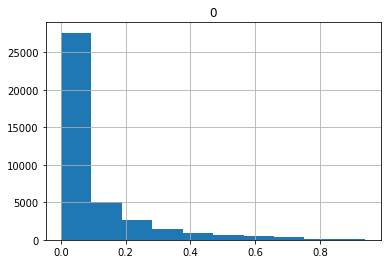

In [158]:
hist = preds.hist(bins=10)

In [176]:
preds[preds[0]>0.30].shape[0]/preds.shape[0]

0.09155897018418642

In [162]:
train[train.hospital_death ==1].shape[0]/train.shape[0]

0.08630183289173836

In [165]:
preds_out = pd.concat([unlabeled.encounter_id, preds],axis=1)

In [186]:
preds_out['hospital_death'] = np.where(preds[0]>=0.5,1,0)

In [187]:
preds_out[['encounter_id','hospital_death']].to_csv('/Users/jekahn/Documents/Personal/wids_attempt1.csv',index=False)

In [179]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
best_grid = grid_search.best_estimator_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 48.7min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 65.1min finished


In [180]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [181]:
y_test_pred_best_rf = grid_search.best_estimator_.predict_proba(test_out2)

In [182]:
y_pred_random_forest2 = grid_search.best_estimator_.predict_proba(X_test)
acc_random_forest2 = round(grid_search.best_estimator_.score(X_test, y_test) * 100, 2)
print (acc_random_forest2)
metrics.roc_auc_score(y_test,y_pred_random_forest2[:,1])

92.58


0.8852572666073795

###  Next model - try xgboost

In [37]:
from xgboost import XGBClassifier

In [38]:
import xgboost

In [39]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [83]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [84]:
y_pred_xgb = xgb_model.predict_proba(X_test)
# y_pred_xgb[0:10]

In [243]:
acc_xgb = round(xgb_model.score(X_test, y_test) * 100, 2)
print (acc_xgb)
metrics.roc_auc_score(y_test,y_pred_xgb[:,1])

92.98


0.8930112449555432

In [85]:
acc_xgb = round(xgb_model.score(X_test, y_test) * 100, 2)
print (acc_xgb)
metrics.roc_auc_score(y_test,y_pred_xgb[:,1])

92.98


0.8927283460752218

In [45]:
acc_xgb = round(estimators[0].score(X_test, y_test) * 100, 2)

In [47]:
y_pred_xgb2 = estimators[0].predict_proba(X_test)
metrics.roc_auc_score(y_test,y_pred_xgb2[:,1])

0.8964192133803714

In [41]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy import stats

clf_xgb = XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(150, 500),
              'learning_rate': stats.uniform(0.01, 0.07),
              'subsample': stats.uniform(0.3, 0.7),
              'max_depth': [3, 5,  7, 9],
              'colsample_bytree': stats.uniform(0.5, 0.45),
              'min_child_weight': [1, 2, 3]
             }
clf = RandomizedSearchCV(clf_xgb, param_distributions = param_dist, n_iter = 25, scoring = 'f1', error_score = 0, verbose = 3, n_jobs = -1)

numFolds = 5
folds = KFold(n_splits = numFolds, shuffle = True)

In [42]:
estimators = []
results = np.zeros(len(X))
score = 0.0
for train_index, test_index in folds.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index].values.ravel(), y.iloc[test_index].values.ravel()
    clf.fit(X_train, y_train)

    estimators.append(clf.best_estimator_)
    results[test_index] = clf.predict(X_test)
    score += f1_score(y_test, results[test_index])
score /= numFolds

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 107.1min finished


NameError: name 'f1_score' is not defined

In [44]:
estimators[0]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5026853088580576, gamma=0,
              learning_rate=0.077597908786555, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=440, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.759351373761064, verbosity=1)

In [ ]:
results

In [199]:
# try fitting on all the data?
xgb_model_full = XGBClassifier()
xgb_model_full.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [210]:
str(pd.Timestamp.now())[0:16]

'2020-01-14 11:53'

In [49]:
def make_final_preds(model, threshold=0.26):
    y_test_pred = model.predict_proba(test_out2)
    preds = pd.DataFrame(y_test_pred[:,1])
    preds_out = pd.concat([unlabeled.encounter_id, preds],axis=1)
    preds_out['hospital_death'] = np.where(preds[0]>=threshold,1,0)
    dt = str(pd.Timestamp.now())[0:16]
    preds_out[['encounter_id','hospital_death']].to_csv('/Users/jekahn/Documents/Personal/wids_attempt_'+dt+'.csv',index=False)
    

In [225]:
make_final_preds(xgb_model_full)

In [50]:
make_final_preds(estimators[0])

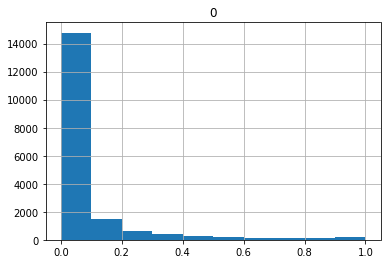

In [53]:
y_test_pred = estimators[0].predict_proba(X_test)
pred = pd.DataFrame(y_test_pred[:,1])
hist = pd.DataFrame(y_test_pred[:,1]).hist(bins=10)

In [223]:
pred[pred[0]>0.26].shape[0]/pred.shape[0]

0.08652182761778773

### Plot ROC curve

In [251]:
metrics.roc_curve(y_test, y_pred_xgb[:, 1])[2]

array([1.9960992 , 0.99609923, 0.952677  , ..., 0.00329159, 0.00327772,
       0.0032442 ], dtype=float32)

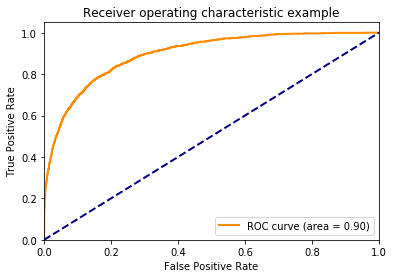

In [51]:
import matplotlib.pyplot as plt
# Compute ROC curve and ROC area for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(n_classes):
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_xgb2[:, 1])
roc_auc = metrics.auc(fpr, tpr)

# Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### What can be improved:
* Add hospital ID as cat variable?
* Missing values - better way to impute them? Include means from unlabeled set in mean calcs?
* A different classification model - how can I do this with neural networks? 
* Visualize variables against target - maybe there is information in IDs?

In [56]:
train.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

In [58]:
# train.hospital_id.unique()